# Analyze Google Play Store dataset

## I - Some question to answer first
1. What are we analyze? What we want to get? What is our problems?
2. What is the metric of sucess?
3. Is the input dataset enough to solve our problems?

## II - Take a look at the dataset and clean it

### Import tool

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

sns.set_style("whitegrid")

### Google Drive authenication

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

import gspread
from gspread_dataframe import get_as_dataframe, set_with_dataframe 

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

### Download and read the dataset

In [0]:
link = 'https://drive.google.com/open?id=1jje-EQBSIp5FSsldVUfiQmH_3YcufwWx'
fluff, id = link.split('=')
downloaded = drive.CreateFile({'id':id}) 
downloaded.GetContentFile('google-play-store.csv')  

In [0]:
gpstore = pd.read_csv('google-play-store.csv')
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


### Get some information of this dataset

In [0]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
App               10841 non-null object
Category          10841 non-null object
Rating            9367 non-null float64
Reviews           10841 non-null object
Size              10841 non-null object
Installs          10841 non-null object
Type              10840 non-null object
Price             10841 non-null object
Content Rating    10840 non-null object
Genres            10841 non-null object
Last Updated      10841 non-null object
Current Ver       10833 non-null object
Android Ver       10838 non-null object
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [0]:
gpstore.describe().T

,count,mean,std,min,25%,50%,75%,max
Rating,9367.0,4.193338,0.537431,1.0,4.0,4.3,4.5,19.0


### Take a look of values in each column and clean it

### App

In [0]:
gpstore.drop_duplicates(subset ='App', keep = False, inplace = True)

In [0]:
gpstore['App'].value_counts()

CP Brown English-Telugu Dictionary                       1
乐屋网: Buying a house, selling a house, renting a house    1
Reindeer VPN - Proxy VPN                                 1
Wifi Mingle                                              1
CN TV Canal 3 - Cable Netword                            1
What's Your CS:GO rank?                                  1
InterracialCupid - Interracial Dating App                1
AE Manager                                               1
Co-op CRS                                                1
WGT Golf Game by Topgolf                                 1
Pregnancy Tracker & Countdown to Baby Due Date           1
DS-Students                                              1
YouCut - Video Editor & Video Maker, No Watermark        1
Keyboard - wallpapers , photos                           1
Florida Travel Guide                                     1
DM Storage (for twitter)                                 1
Shopfully - Weekly Ads & Deals                          

In [0]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8862 entries, 0 to 10840
Data columns (total 13 columns):
App               8862 non-null object
Category          8862 non-null object
Rating            7408 non-null float64
Reviews           8862 non-null object
Size              8862 non-null object
Installs          8862 non-null object
Type              8861 non-null object
Price             8862 non-null object
Content Rating    8861 non-null object
Genres            8862 non-null object
Last Updated      8862 non-null object
Current Ver       8854 non-null object
Android Ver       8859 non-null object
dtypes: float64(1), object(12)
memory usage: 969.3+ KB


#### Category

In [0]:
gpstore['Category'].value_counts(dropna=False)

FAMILY                 1790
GAME                    851
TOOLS                   814
BUSINESS                386
PERSONALIZATION         363
LIFESTYLE               357
PRODUCTIVITY            341
MEDICAL                 334
FINANCE                 328
SPORTS                  298
COMMUNICATION           272
HEALTH_AND_FITNESS      246
PHOTOGRAPHY             244
NEWS_AND_MAGAZINES      234
BOOKS_AND_REFERENCE     213
SOCIAL                  200
TRAVEL_AND_LOCAL        195
SHOPPING                166
VIDEO_PLAYERS           153
MAPS_AND_NAVIGATION     125
DATING                  116
FOOD_AND_DRINK           98
AUTO_AND_VEHICLES        85
EDUCATION                84
LIBRARIES_AND_DEMO       83
WEATHER                  76
EVENTS                   64
HOUSE_AND_HOME           61
ART_AND_DESIGN           60
PARENTING                60
ENTERTAINMENT            59
BEAUTY                   53
COMICS                   52
1.9                       1
Name: Category, dtype: int64

**Why there's '1.9' in category list**

In [0]:
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",1.0.19,4.0 and up,NaN


Look like all the columns of this row has been shifted. Anyway this row is not reliable, we prefer to dropping it to fixing it

In [0]:
gpstore = gpstore[gpstore['Category'] != '1.9']
gpstore[gpstore['Category'] == '1.9']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


In [0]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 10840
Data columns (total 13 columns):
App               8861 non-null object
Category          8861 non-null object
Rating            7407 non-null float64
Reviews           8861 non-null object
Size              8861 non-null object
Installs          8861 non-null object
Type              8860 non-null object
Price             8861 non-null object
Content Rating    8861 non-null object
Genres            8861 non-null object
Last Updated      8861 non-null object
Current Ver       8853 non-null object
Android Ver       8859 non-null object
dtypes: float64(1), object(12)
memory usage: 969.2+ KB


#### Rating

In [0]:
gpstore['Rating'].value_counts(dropna=False)

NaN    1454
4.3     776
4.4     768
4.5     729
4.2     717
4.6     588
4.1     555
4.0     473
4.7     404
3.9     339
3.8     272
5.0     268
3.7     212
4.8     209
3.6     160
3.5     149
3.4     124
3.3      98
4.9      84
3.0      79
3.1      69
3.2      62
2.9      45
2.8      39
2.6      22
2.7      21
2.3      20
2.4      19
2.5      19
1.0      16
2.2      14
2.0      12
1.9      10
1.8       8
1.7       8
2.1       8
1.6       4
1.5       3
1.4       3
1.2       1
Name: Rating, dtype: int64

There are so many NaN values in Rating column, so we will fill them by mean of the non-NaN values

In [0]:
gpstore['Rating'].fillna(round(gpstore[gpstore['Rating'].isnull() == False]['Rating'].mean(), 1), inplace = True) 
gpstore[gpstore['Rating'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver


#### Price

In [0]:
gpstore['Price'].value_counts(dropna=False)

0          8147
$0.99       142
$2.99       119
$1.99        73
$4.99        68
$3.99        52
$1.49        46
$2.49        24
$5.99        23
$9.99        17
$399.99      12
$4.49         9
$6.99         8
$14.99        7
$3.49         7
$7.99         7
$6.49         5
$8.99         5
$5.49         4
$19.99        4
$29.99        3
$1.00         3
$12.99        3
$2.00         3
$13.99        2
$10.99        2
$8.49         2
$7.49         2
$17.99        2
$1.70         2
           ... 
$1.59         1
$2.90         1
$3.02         1
$11.99        1
$74.99        1
$4.60         1
$3.04         1
$1.96         1
$394.99       1
$15.99        1
$200.00       1
$299.99       1
$154.99       1
$109.99       1
$1.20         1
$2.56         1
$19.40        1
$18.99        1
$4.77         1
$37.99        1
$4.59         1
$5.00         1
$4.85         1
$3.28         1
$10.00        1
$4.84         1
$400.00       1
$1.61         1
$2.60         1
$1.29         1
Name: Price, Length: 87,

In [0]:
# Price column's dtype is dtype('O') which is Python type string
gpstore.Price.dtype

dtype('O')

In [0]:
gpstore[gpstore['Type']=='Paid']['Price'].head() # e.g $4.99 is a string

427    $3.99
478    $1.49
479    $2.99
480    $3.99
481    $7.99
Name: Price, dtype: object

In [0]:
# Price in $ is the column having numeric values of Price column
gpstore['Price in $'] = gpstore['Price'].str.lstrip('$').apply(lambda str_f: float(str_f))
gpstore['Price in $'].dtype

dtype('float64')

In [0]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8861 entries, 0 to 10840
Data columns (total 14 columns):
App               8861 non-null object
Category          8861 non-null object
Rating            8861 non-null float64
Reviews           8861 non-null object
Size              8861 non-null object
Installs          8861 non-null object
Type              8860 non-null object
Price             8861 non-null object
Content Rating    8861 non-null object
Genres            8861 non-null object
Last Updated      8861 non-null object
Current Ver       8853 non-null object
Android Ver       8859 non-null object
Price in $        8861 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Type

In [0]:
gpstore['Type'].value_counts(dropna=False)

Free    8146
Paid     714
NaN        1
Name: Type, dtype: int64

In [0]:
#Type columns has 1 null
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
9148,Command & Conquer: Rivals,FAMILY,4.2,0,Varies with device,0,NaN,0,Everyone 10+,Strategy,"June 28, 2018",Varies with device,Varies with device,0.0


In [0]:
# Exclude that row
gpstore.dropna(subset=['Type'], inplace=True)
gpstore[gpstore['Type'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [0]:
# check if there are any row that Price is 0 but Type is not Free
gpstore[(gpstore['Price'] == '0') & (gpstore['Type'] != 'Free')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [0]:
# check if there are any row that Price is greater than 0 but Type is not Paid
gpstore[(gpstore['Price in $'] > 0) & (gpstore['Type'] != 'Paid')]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [0]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8860 entries, 0 to 10840
Data columns (total 14 columns):
App               8860 non-null object
Category          8860 non-null object
Rating            8860 non-null float64
Reviews           8860 non-null object
Size              8860 non-null object
Installs          8860 non-null object
Type              8860 non-null object
Price             8860 non-null object
Content Rating    8860 non-null object
Genres            8860 non-null object
Last Updated      8860 non-null object
Current Ver       8852 non-null object
Android Ver       8858 non-null object
Price in $        8860 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Content Rating

In [0]:
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7334
Teen                927
Mature 17+          316
Everyone 10+        278
Adults only 18+       3
Unrated               2
Name: Content Rating, dtype: int64

In [0]:
#Unrated can be considered as NaN value and there are only 2 row having Unrated value in Content Rating column, so we drop them =))
gpstore = gpstore[gpstore['Content Rating'] != 'Unrated']
gpstore['Content Rating'].value_counts(dropna=False)

Everyone           7334
Teen                927
Mature 17+          316
Everyone 10+        278
Adults only 18+       3
Name: Content Rating, dtype: int64

In [0]:
# check our dataframe again
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8858 entries, 0 to 10840
Data columns (total 14 columns):
App               8858 non-null object
Category          8858 non-null object
Rating            8858 non-null float64
Reviews           8858 non-null object
Size              8858 non-null object
Installs          8858 non-null object
Type              8858 non-null object
Price             8858 non-null object
Content Rating    8858 non-null object
Genres            8858 non-null object
Last Updated      8858 non-null object
Current Ver       8850 non-null object
Android Ver       8856 non-null object
Price in $        8858 non-null float64
dtypes: float64(2), object(12)
memory usage: 1.0+ MB


#### Reviews / Genres / Last Updated
These columns don't seem to need  cleaning

In [0]:
gpstore['Reviews'].value_counts(dropna=False)

0          589
1          271
2          212
3          165
4          137
5          108
6           91
7           87
8           70
9           63
10          61
12          56
11          52
13          49
17          46
14          41
19          41
16          35
20          35
21          31
30          30
24          30
25          30
15          29
38          29
18          27
22          26
23          25
27          25
33          24
          ... 
113715       1
809          1
16966        1
15680        1
5305         1
47576        1
133180       1
4537         1
935          1
54207        1
317          1
29990        1
29495        1
210317       1
69488        1
6495         1
117925       1
38824        1
15880        1
197540       1
6230         1
6701         1
1611         1
3213548      1
88486        1
10158        1
763          1
4444         1
9636         1
8662         1
Name: Reviews, Length: 4621, dtype: int64

In [0]:
gpstore['Genres'].value_counts(dropna=False)

Tools                                    812
Entertainment                            522
Education                                484
Business                                 386
Personalization                          363
Lifestyle                                356
Productivity                             341
Medical                                  334
Finance                                  328
Sports                                   301
Communication                            272
Action                                   270
Health & Fitness                         246
Photography                              244
News & Magazines                         234
Books & Reference                        213
Social                                   200
Travel & Local                           194
Simulation                               187
Arcade                                   167
Shopping                                 166
Casual                                   153
Video Play

In [0]:
gpstore['Last Updated'].value_counts(dropna=False)

August 3, 2018       210
August 2, 2018       183
August 1, 2018       161
July 31, 2018        154
July 30, 2018        128
July 26, 2018        118
July 25, 2018        103
July 24, 2018        101
July 23, 2018        100
July 27, 2018         99
July 19, 2018         84
July 18, 2018         82
August 6, 2018        82
August 4, 2018        77
July 12, 2018         75
July 9, 2018          74
July 11, 2018         73
July 3, 2018          72
July 17, 2018         72
July 13, 2018         68
July 16, 2018         65
July 5, 2018          64
July 20, 2018         57
May 24, 2018          56
June 26, 2018         50
June 25, 2018         50
June 13, 2018         47
July 28, 2018         46
July 4, 2018          45
May 25, 2018          43
                    ... 
May 16, 2015           1
January 13, 2014       1
January 23, 2014       1
July 27, 2013          1
February 1, 2016       1
May 14, 2014           1
May 24, 2014           1
December 1, 2015       1
May 2, 2016            1


#### Current Ver


In [0]:
gpstore[gpstore['Current Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $
15,Learn To Draw Kawaii Characters,ART_AND_DESIGN,3.2,55,2.7M,"5,000+",Free,0,Everyone,Art & Design,"June 6, 2018",NaN,4.2 and up,0.00
1553,Market Update Helper,LIBRARIES_AND_DEMO,4.1,20145,11k,"1,000,000+",Free,0,Everyone,Libraries & Demo,"February 12, 2013",NaN,1.5 and up,0.00
6322,Virtual DJ Sound Mixer,TOOLS,4.2,4010,8.7M,"500,000+",Free,0,Everyone,Tools,"May 10, 2017",NaN,4.0 and up,0.00
6803,BT Master,FAMILY,4.2,0,222k,100+,Free,0,Everyone,Education,"November 6, 2016",NaN,1.6 and up,0.00
7333,Dots puzzle,FAMILY,4.0,179,14M,"50,000+",Paid,$0.99,Everyone,Puzzle,"April 18, 2018",NaN,4.0 and up,0.99
7407,Calculate My IQ,FAMILY,4.2,44,7.2M,"10,000+",Free,0,Everyone,Entertainment,"April 3, 2017",NaN,2.3 and up,0.00
7730,UFO-CQ,TOOLS,4.2,1,237k,10+,Paid,$0.99,Everyone,Tools,"July 4, 2016",NaN,2.0 and up,0.99
10342,La Fe de Jesus,BOOKS_AND_REFERENCE,4.2,8,658k,"1,000+",Free,0,Everyone,Books & Reference,"January 31, 2017",NaN,3.0 and up,0.00


In [0]:
# fill NaN value in Current Ver column with 1.0.0
gpstore['Current Ver'].fillna('1.0.0', inplace=True)

#### Android Ver

In [0]:
gpstore['Android Ver'].value_counts(dropna=False)

4.1 and up            2042
4.0.3 and up          1311
4.0 and up            1218
Varies with device     752
4.4 and up             710
2.3 and up             594
5.0 and up             453
4.2 and up             354
2.3.3 and up           264
2.2 and up             234
3.0 and up             221
4.3 and up             206
2.1 and up             132
1.6 and up             116
6.0 and up              51
7.0 and up              42
3.2 and up              36
2.0 and up              32
5.1 and up              21
1.5 and up              20
4.4W and up             10
3.1 and up              10
2.0.1 and up             7
8.0 and up               6
7.1 and up               3
1.0 and up               2
5.0 - 8.0                2
4.0.3 - 7.1.1            2
NaN                      2
7.0 - 7.1.1              1
5.0 - 6.0                1
4.1 - 7.1.1              1
2.2 - 7.1.1              1
5.0 - 7.1.1              1
Name: Android Ver, dtype: int64

In [0]:
# Drop 2 NaN value
gpstore.dropna(subset=['Android Ver'], inplace=True)
gpstore[gpstore['Android Ver'].isnull()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $


In [0]:
# Standardize Android Ver: X.X.X - Y.Y.Y
regex = ' [\w+]+(?:\.\w+) '
gpstore['Android Ver'] = " " + gpstore['Android Ver'] + " "

gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('and', '-')
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('up', 'latest')

import re
def append_by_regex(text):
  search_value = re.search(regex, text)
  while search_value:
    pos = search_value.end()
    text = text[:pos].rstrip() + ".0 " + text[pos:] 
    search_value = re.search(regex, text)
  return text

gpstore['Android Ver'] = gpstore['Android Ver'].apply(append_by_regex)
gpstore['Android Ver'] = gpstore['Android Ver'].str.strip()
gpstore['Android Ver'].value_counts(dropna=False)

4.1.0 - latest        2042
4.0.3 - latest        1311
4.0.0 - latest        1218
Varies with device     752
4.4.0 - latest         710
2.3.0 - latest         594
5.0.0 - latest         453
4.2.0 - latest         354
2.3.3 - latest         264
2.2.0 - latest         234
3.0.0 - latest         221
4.3.0 - latest         206
2.1.0 - latest         132
1.6.0 - latest         116
6.0.0 - latest          51
7.0.0 - latest          42
3.2.0 - latest          36
2.0.0 - latest          32
5.1.0 - latest          21
1.5.0 - latest          20
4.4W.0 - latest         10
3.1.0 - latest          10
2.0.1 - latest           7
8.0.0 - latest           6
7.1.0 - latest           3
1.0.0 - latest           2
4.0.3 - 7.1.1            2
5.0.0 - 8.0.0            2
7.0.0 - 7.1.1            1
5.0.0 - 7.1.1            1
5.0.0 - 6.0.0            1
2.2.0 - 7.1.1            1
4.1.0 - 7.1.1            1
Name: Android Ver, dtype: int64

In [0]:
# Handle "Varies with device"

# split each value in Android Ver column into two columns Android MinVer and Android MaxVer
gpstore['Android MinVer'] = gpstore['Android Ver'].str.split('-').str[0].str.strip()
gpstore['Android MaxVer'] = gpstore['Android Ver'].str.split('-').str[1].str.strip()

# When there's not "-" in Android Ver string (in case Android Ver value is "Varies with device")
# Android MinVer values will be assigned with "Varies with device", so we re-assign theses values with NaN
gpstore['Android MinVer'].replace('Varies with device', np.NaN, inplace=True)

# Fillna in Android MinVer with min of non-null values in Android MinVer
gpstore['Android MinVer'].fillna(gpstore['Android MinVer'].dropna().min(), inplace=True)

# Fillna in Android MaxVer with max of non-null values in Android MaxVer
gpstore['Android MaxVer'].fillna(gpstore['Android MaxVer'].dropna().max(), inplace=True)

# Replace "- latest" with and up to restore the original form of Android Ver
gpstore['Android Ver'] = gpstore['Android Ver'].str.replace('- latest', "and up")
gpstore.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Price in $,Android MinVer,Android MaxVer
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up,0.0,4.0.3,latest
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up,0.0,4.0.3,latest
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2.0 and up,0.0,4.2.0,latest
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4.0 and up,0.0,4.4.0,latest
5,Paper flowers instructions,ART_AND_DESIGN,4.4,167,5.6M,"50,000+",Free,0,Everyone,Art & Design,"March 26, 2017",1.0,2.3.0 and up,0.0,2.3.0,latest


In [0]:
# check our dataframe
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 10840
Data columns (total 16 columns):
App               8856 non-null object
Category          8856 non-null object
Rating            8856 non-null float64
Reviews           8856 non-null object
Size              8856 non-null object
Installs          8856 non-null object
Type              8856 non-null object
Price             8856 non-null object
Content Rating    8856 non-null object
Genres            8856 non-null object
Last Updated      8856 non-null object
Current Ver       8856 non-null object
Android Ver       8856 non-null object
Price in $        8856 non-null float64
Android MinVer    8856 non-null object
Android MaxVer    8856 non-null object
dtypes: float64(2), object(14)
memory usage: 1.1+ MB


#### Install

In [0]:
gpstore['Installs'].value_counts()

1,000,000+        1280
100,000+          1063
10,000+           1008
1,000+             868
10,000,000+        715
100+               701
5,000,000+         516
500,000+           472
5,000+             461
50,000+            460
10+                384
500+               325
50+                203
50,000,000+        147
100,000,000+        84
5+                  82
1+                  67
0+                  14
500,000,000+         4
1,000,000,000+       2
Name: Installs, dtype: int64

In [0]:
# Installs column's dtype is dtype('O') which is Python type string
gpstore['Installs'].dtype

dtype('O')

In [0]:
# The number of installations of each app can be equal or greater than the value in Installs column
# So we create Installs At Least column having numeric value of the number of installations at least
gpstore['Installs At Least'] = gpstore['Installs'].replace('[^0-9]', '', regex=True).astype(int)

In [0]:
gpstore['Installs At Least'].value_counts()

1000000       1280
100000        1063
10000         1008
1000           868
10000000       715
100            701
5000000        516
500000         472
5000           461
50000          460
10             384
500            325
50             203
50000000       147
100000000       84
5               82
1               67
0               14
500000000        4
1000000000       2
Name: Installs At Least, dtype: int64

#### Size

In [0]:
gpstore['Size'].value_counts()

Varies with device    935
11M                   171
12M                   170
13M                   165
14M                   163
15M                   149
26M                   136
17M                   131
16M                   128
10M                   123
21M                   117
19M                   113
18M                   110
20M                   109
25M                   104
24M                   102
22M                    94
23M                    94
27M                    86
29M                    86
28M                    85
30M                    82
3.3M                   70
2.3M                   67
2.5M                   67
33M                    67
2.9M                   65
2.8M                   65
31M                    64
3.4M                   63
                     ... 
108k                    1
818k                    1
478k                    1
314k                    1
191k                    1
714k                    1
459k                    1
93k         

In [0]:
gpstore['Size In Byte'] = gpstore['Size']

In [0]:
import re

In [0]:
index_list = gpstore.index.values.tolist()
for indx in index_list:
  old_value = gpstore.at[indx, 'Size In Byte']
  if (old_value == 'Varies with device'):
    continue
  old_value_abs = re.findall('\d+\.*\d*', old_value)
  # Check to make sure only 1 number value
  if (len(old_value_abs) != 1):
    print(old_value)
  old_value_unit = re.findall('[^\d\W]$', old_value)
#   print(old_value_unit)
  new_value = 0
  if old_value_unit[0] == 'M':
    new_value = float(old_value_abs[0]) * 1000000
  elif old_value_unit[0] == 'k':
    new_value = float(old_value_abs[0]) * 1000
  else:
    print("Error: undefine unit ", old_value_unit)
  gpstore.at[indx, 'Size In Byte'] = new_value

Now we update "Varies with device" size by mean value of each category

In [0]:
cate_list = gpstore['Category'].unique().tolist()
gpstore['Size In Byte'].replace(to_replace='Varies with device', value=np.nan, inplace=True)
gpstore['Size In Byte'].astype('category', inplace=True)
for cate in cate_list:
  cate_size_mean = round(gpstore[gpstore['Category'] == cate]['Size In Byte'].mean(), 1)
  gpstore[gpstore['Category'] == cate] = gpstore[gpstore['Category'] == cate].fillna(cate_size_mean)
  

In [0]:
gpstore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8856 entries, 0 to 10840
Data columns (total 18 columns):
App                  8856 non-null object
Category             8856 non-null object
Rating               8856 non-null float64
Reviews              8856 non-null object
Size                 8856 non-null object
Installs             8856 non-null object
Type                 8856 non-null object
Price                8856 non-null object
Content Rating       8856 non-null object
Genres               8856 non-null object
Last Updated         8856 non-null object
Current Ver          8856 non-null object
Android Ver          8856 non-null object
Price in $           8856 non-null float64
Android MinVer       8856 non-null object
Android MaxVer       8856 non-null object
Installs At Least    8856 non-null int64
Size In Byte         8856 non-null float64
dtypes: float64(3), int64(1), object(14)
memory usage: 1.6+ MB


## Let draw some figure

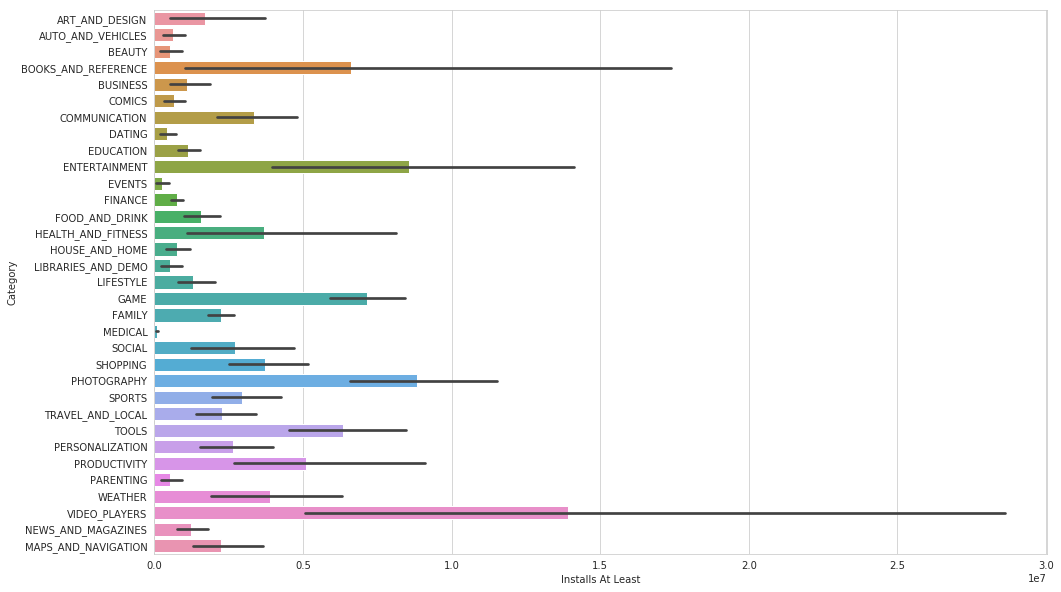

In [0]:
plt.figure(figsize=(16, 10))
sns.barplot(data=gpstore, y='Category', x='Installs At Least')

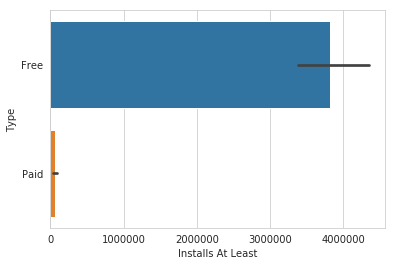

In [0]:
sns.barplot(data=gpstore, y='Type', x='Installs At Least')

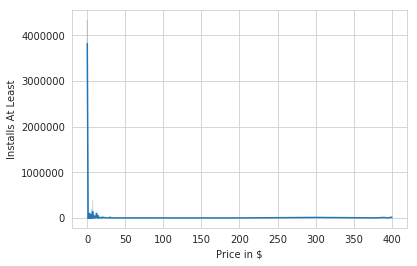

In [0]:
sns.lineplot(data=gpstore, x='Price in $', y='Installs At Least')

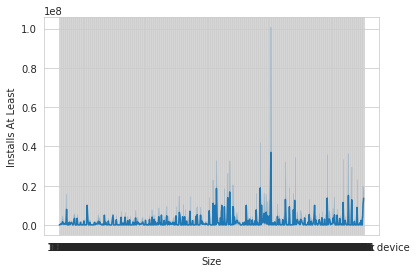

In [0]:
sns.lineplot(data=gpstore, x='Size', y='Installs At Least')

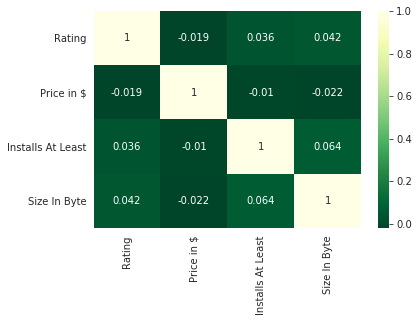

In [0]:
sns.heatmap(gpstore.corr(), annot=True, cmap='YlGn_r')

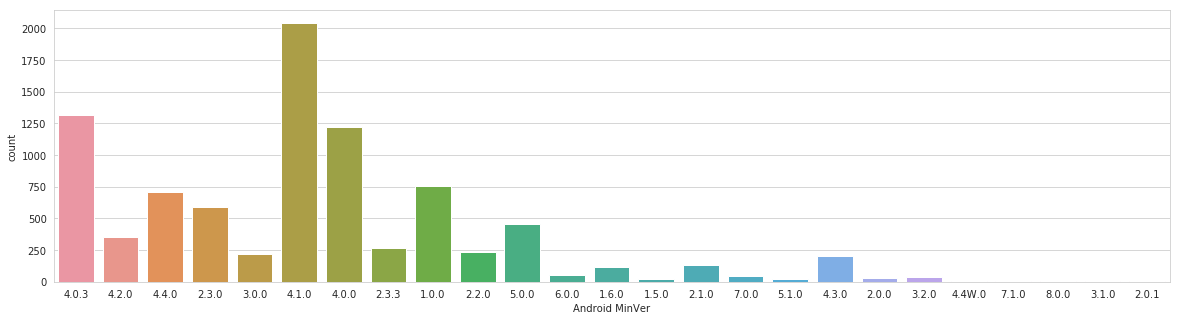

In [0]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore, x='Android MinVer')

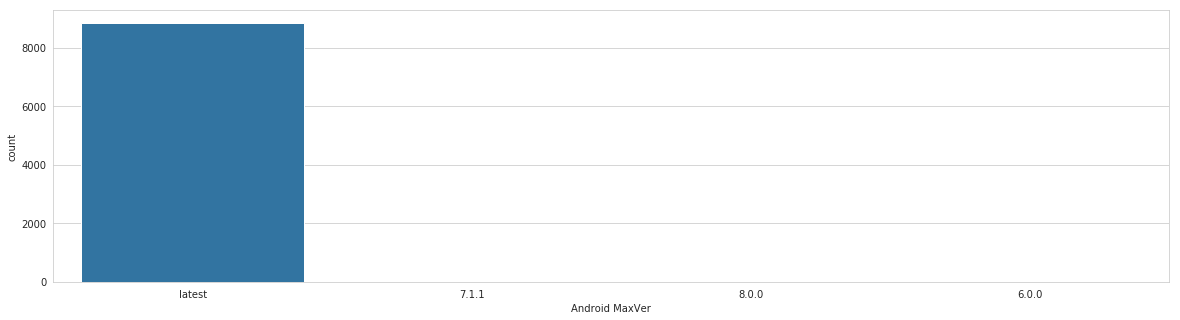

In [0]:
plt.figure(figsize=(20, 5))
sns.countplot(data=gpstore, x='Android MaxVer')

## 3. Make Google sheets file

In [0]:
gc = gspread.authorize(GoogleCredentials.get_application_default()) #grant access to google drive 

In [0]:
def check_exists(path):
  try:
    sh = gc.open(path)
    return True
  except:
    return False

def create_new_worksheet(path='worksheet', sheets={"sheet1":""}):
    if check_exists(path):
        print('create_new_worksheet(): File exists')
        return gc.open(path)
    sh = gc.create(path)
    for name, cols in sheets.items():
        sh.add_worksheet(title=name, rows="100", cols="100")
        sh.values_update(
            name + '!A1',
            params={'valueInputOption': 'RAW'},
            body={'values': [cols]}
        )      
    sh.del_worksheet(sh.sheet1)
    return sh

In [0]:
sheets = {
    'Google Play Store': gpstore.columns.values.tolist()
}
sh = create_new_worksheet('Google Play Store', sheets)

In [0]:
sh.values_update(
  'Google Play Store!A2',
    params={'valueInputOption': 'RAW'},
    body={'values': gpstore.fillna('').values.tolist()}
)

{'spreadsheetId': '1yKtvCzuPXKPejRDgEnPztYjJI1knjGVRIizxTFDfMxo',
 'updatedCells': 159408,
 'updatedColumns': 18,
 'updatedRange': "'Google Play Store'!A2:R8857",
 'updatedRows': 8856}